In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle your data before splitting

data_rem = data[0:1000].T
Y_rem = data_rem[0]
X_rem = data_rem[1:n]
X_rem = X_rem / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape


In [4]:
Y_train


array([7, 8, 4, ..., 1, 3, 4])

In [5]:
X_train [ :,0].shape

(784,)

this is the first column and it has 784 pixels as input features. 

In [6]:
def init_params():
    W1 = np.random.rand(10,784)-0.5
    b1 = np.random.rand(10,1)-0.5
    W2 = np.random.rand(10,10)-0.5
    b2 = np.random.rand(10,1)-0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z)/ sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)+b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+ 1))
    one_hot_Y [np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y,):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2
    
    
    

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions , Y)
    return np.sum(predictions == Y) / Y.size
    
def gradient_descent (X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
       Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
       dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2,W1, W2, X, Y)
       W1, b1, W2, b2 = update_param(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
       if i % 10 == 0:
           print ("Iteration: ", i)
           predictions = get_predictions(A2)
           print(get_accuracy(predictions, Y))

    return W1, b1, W2, b2
        

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 0 7 ... 7 0 8] [7 8 4 ... 1 3 4]
0.12514634146341463
Iteration:  10
[2 0 7 ... 0 0 8] [7 8 4 ... 1 3 4]
0.1728780487804878
Iteration:  20
[0 0 7 ... 0 0 0] [7 8 4 ... 1 3 4]
0.2103170731707317
Iteration:  30
[0 0 7 ... 0 0 0] [7 8 4 ... 1 3 4]
0.2669268292682927
Iteration:  40
[0 0 7 ... 1 0 0] [7 8 4 ... 1 3 4]
0.31995121951219513
Iteration:  50
[0 0 7 ... 1 0 0] [7 8 4 ... 1 3 4]
0.36521951219512194
Iteration:  60
[0 0 7 ... 1 0 6] [7 8 4 ... 1 3 4]
0.40526829268292686
Iteration:  70
[8 0 7 ... 1 0 4] [7 8 4 ... 1 3 4]
0.4498048780487805
Iteration:  80
[8 0 7 ... 1 0 4] [7 8 4 ... 1 3 4]
0.49473170731707317
Iteration:  90
[8 0 7 ... 1 2 4] [7 8 4 ... 1 3 4]
0.5317073170731708
Iteration:  100
[8 0 7 ... 1 2 4] [7 8 4 ... 1 3 4]
0.5629512195121951
Iteration:  110
[8 0 7 ... 1 2 4] [7 8 4 ... 1 3 4]
0.5912682926829268
Iteration:  120
[8 0 7 ... 1 2 4] [7 8 4 ... 1 3 4]
0.618390243902439
Iteration:  130
[8 0 7 ... 1 2 4] [7 8 4 ... 1 3 4]
0.6425609756097561
Iteration:  1

In [9]:
def make_predictions(X,W1, b1, W2, b2):
    _, _,_, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train [:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation= 'nearest')
    plt.show()

Prediction:  [2]
Label:  7


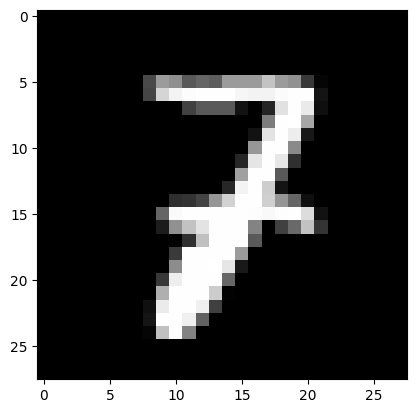

Prediction:  [8]
Label:  8


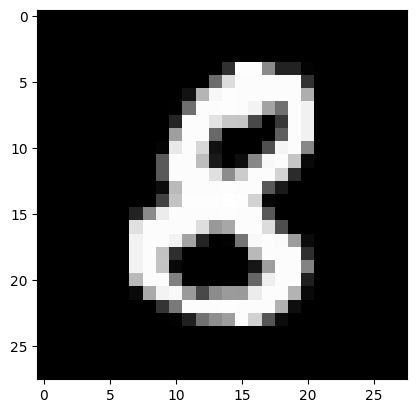

Prediction:  [9]
Label:  4


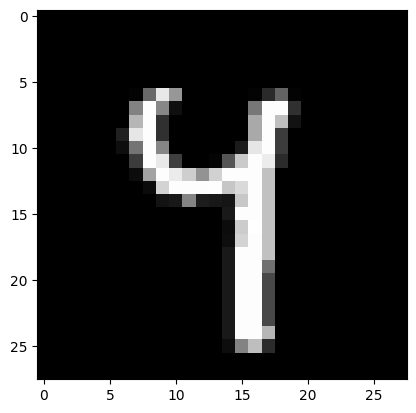

Prediction:  [7]
Label:  3


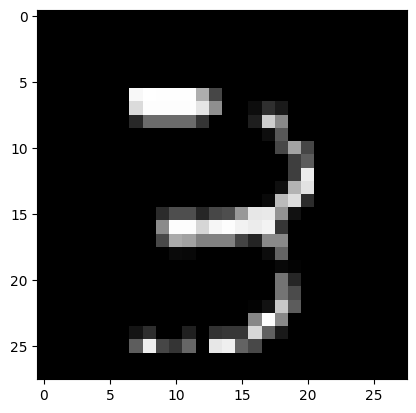

Prediction:  [3]
Label:  3


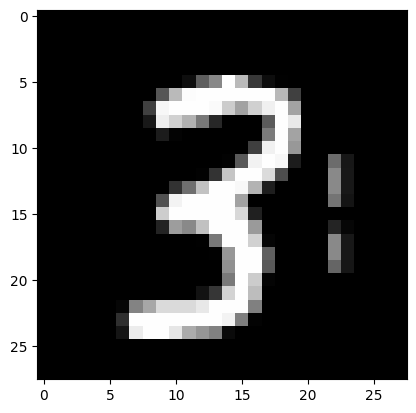

In [10]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)

In [11]:
rem_predictions = make_predictions(X_rem, W1, b1, W2, b2)
get_accuracy(rem_predictions, Y_rem)

[7 8 4 0 0 0 0 2 4 7 9 6 5 4 1 3 3 6 0 3 0 1 0 2 4 5 6 2 8 7 1 9 7 7 7 5 3
 4 7 4 8 2 5 9 3 1 8 8 3 0 2 6 6 8 0 1 1 8 0 2 2 3 5 7 0 4 7 6 5 1 7 2 3 2
 2 6 8 1 9 3 5 1 2 6 5 1 6 8 2 2 3 5 8 7 8 3 6 9 8 0 8 3 1 9 3 7 7 3 7 3 5
 7 0 4 9 9 7 3 6 9 8 3 1 3 4 9 5 7 7 4 9 6 5 0 5 0 0 8 3 0 9 6 3 0 6 2 5 6
 8 0 5 1 0 0 5 0 4 4 6 3 7 3 1 1 8 9 4 7 9 6 8 2 7 0 9 5 4 6 1 4 1 8 2 8 0
 1 3 6 5 2 9 0 9 5 6 4 2 8 3 5 5 0 5 7 2 0 5 6 2 3 7 7 0 6 1 5 6 5 3 2 9 4
 2 1 4 9 3 3 5 2 5 6 9 6 8 8 5 3 7 0 5 4 5 7 8 8 5 5 5 8 2 8 8 8 7 6 9 5 8
 2 0 8 2 7 1 8 6 7 3 1 3 7 9 1 6 1 0 5 8 3 8 0 3 5 5 3 1 5 8 9 9 8 0 2 0 5
 4 3 7 3 7 5 5 9 6 6 9 0 7 6 1 3 2 4 7 3 0 7 8 0 1 9 0 0 2 9 7 3 0 4 5 3 1
 0 5 5 3 8 6 8 0 9 9 0 5 5 3 9 4 9 1 9 3 7 3 5 7 5 2 1 6 9 3 1 6 3 9 9 8 4
 9 5 5 0 0 7 7 9 3 3 0 2 1 2 4 3 8 9 1 8 0 9 0 6 2 5 1 4 3 2 2 6 3 7 2 4 0
 9 9 0 2 2 0 4 9 2 4 1 4 0 0 9 7 3 4 6 4 3 0 9 3 9 1 8 8 9 3 6 0 1 3 3 3 9
 0 0 0 6 0 7 8 4 7 0 9 1 5 9 7 3 6 1 0 4 7 0 3 0 7 8 9 9 5 0 8 9 3 5 1 2 9
 3 8 8 8 8 7 2 5 6 8 8 8 

0.873